# Detla method


## Transformation of MLE(Maximum Likelihood Estimator)
- if $\hat{\theta}$ is the MLE of $\theta$, then for any function $\tau$, $\tau(\hat{\theta})$ is the MLE of $\tau(\theta)$

Meaning:  
If $\theta$ is the parameter of interest and $\hat{\theta}$ is the MLE of $\theta$, then $\hat{\theta}$ is a transformation of another MLE, such that $\hat{\theta}=\tau(\hat{\theta_y})$. We can approximate $\hat{\theta}$ by using $\hat{\theta_y}$  



### Invariance Property of MLEs
Supposed sample mean $\hat{\mu}=\bar{Y}$ is a MLE of the population mean $\mu$.  
Then the MLE of $1/\mu$ is $1/\bar{Y}$, which is the point estimator of $1/\mu$.

### Variance of MLE transformations
What is the confidence interval of the estimate $1/\hat{\mu}$?  
-   What is $Var[\tau(\theta)]$?

Assume 
$$\hat{\theta}_i \sim N(\theta_0,\: \sigma^2/\sqrt{n})$$  
- By central limit theorem, asymptotic normality of MLEs  

in other words  
$$\sqrt{n}(\hat{\theta}_i-\theta_0) \sim N(0, \: \sigma^2)$$


Then  
$$\sqrt{n}(\tau(\hat{\theta}_i)-\tau(\theta_0)) \sim N(0, \: [\tau^{\prime}(\theta_0)]^2\sigma^2)$$  
Therefore  
$$Var[\tau(\theta)] \approx [\tau^{\prime}(\theta_0)]^2\sigma^2$$


### Example: $1/\mu$

$$\tau(\mu)=1/\mu$$  
$$\tau^{\prime}(\mu)=\frac{-1}{\mu^2}$$  
$$\sqrt{n}(1/\bar{Y}-1/\mu) \sim N(0, \: (\frac{-1}{\mu^2})^2\sigma^2)$$  
Then the variance of $1/\bar{Y}$ is $\frac{\sigma^2}{\mu^4}$


Try $Y \sim N(0.5, \: 1)$

(is $1/\mu$ a MLE of anything?)

In [111]:
import numpy as np
import matplotlib.pyplot as plt


In [112]:
population_mean = 0.5
population_sd = 1
n = 100000
sample_size = 1000

population

(array([5.0000e+00, 1.2200e+02, 1.5580e+03, 9.4310e+03, 2.6712e+04,
        3.4846e+04, 2.0880e+04, 5.6850e+03, 7.1400e+02, 4.7000e+01]),
 array([-4.35211765, -3.4427287 , -2.53333974, -1.62395078, -0.71456183,
         0.19482713,  1.10421609,  2.01360504,  2.922994  ,  3.83238296,
         4.74177191]),
 <BarContainer object of 10 artists>)

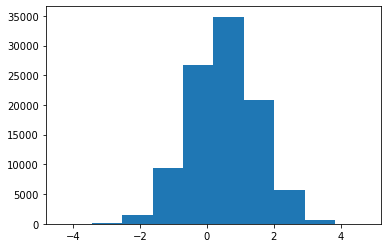

In [113]:
np.random.seed(0)
y = population_mean + np.random.randn(n)
plt.hist(y)


sample

(array([  1.,   7.,  48., 108., 200., 249., 213., 110.,  43.,  21.]),
 array([-3.0438032 , -2.40580761, -1.76781201, -1.12981642, -0.49182082,
         0.14617477,  0.78417036,  1.42216596,  2.06016155,  2.69815715,
         3.33615274]),
 <BarContainer object of 10 artists>)

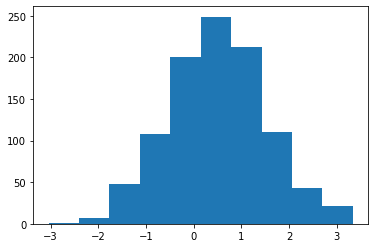

In [114]:
np.random.seed(0)
sample_y = np.random.choice(y, sample_size, replace=False)
plt.hist(sample_y)

In [115]:
delta_target = 1/np.mean(sample_y)
delta_target_var = np.var(sample_y)/np.mean(sample_y)**4/sample_size
(delta_target, delta_target_var) 

(1.9762556457798626, 0.015719008216899196)

$1/\mu$ should be $1/0.5=2$  
$\sigma$ should be $1/0.5^4/1000$

++The 68% confidence interval++

In [116]:
(delta_target-delta_target_var**0.5, delta_target+delta_target_var**0.5)

(1.850880176820025, 2.1016311147397)

## Using bootstrap
If using bootstrap to find the exact same thing: $1/\mu$ and CI

In [117]:
def single_bootstrap(sample):
    bootstrapped = np.random.choice(sample, len(sample), replace=True)
    return 1/np.mean(bootstrapped)



In [118]:
bootstrap_time = 10000
bootstrap_sample = []
for i in range(bootstrap_time):
    bootstrap_sample.append(single_bootstrap(sample_y))

(array([4.500e+01, 6.150e+02, 2.207e+03, 3.402e+03, 2.347e+03, 1.009e+03,
        3.000e+02, 6.100e+01, 1.200e+01, 2.000e+00]),
 array([1.588803  , 1.69618831, 1.80357362, 1.91095894, 2.01834425,
        2.12572957, 2.23311488, 2.34050019, 2.44788551, 2.55527082,
        2.66265613]),
 <BarContainer object of 10 artists>)

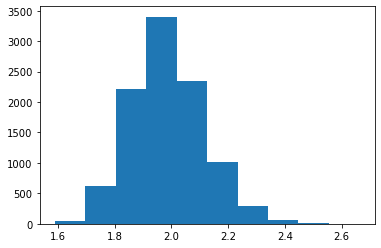

In [119]:
plt.hist(bootstrap_sample)

In [120]:
np.mean(bootstrap_sample)

1.9860574970638907

CI

In [121]:
lower = np.percentile(bootstrap_sample, 50-34)
upper = np.percentile(bootstrap_sample, 50+34)
(lower, upper) 

(1.8619385725271382, 2.1128037869699337)

variance

In [122]:
bootstrap_var = ((upper-lower)/2)**2
bootstrap_var

0.015733338954357433

## Simple validation  
sample_y $\rightarrow$ [inverse] $\rightarrow$ $\mu, \: \sigma$

In [123]:
inversed_sample_y = np.power(sample_y, -1)

In [124]:
np.var(sample_y)

1.0305110343707986

(array([  1.,   1., 986.,   8.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([-335.26183719, -209.90408621,  -84.54633524,   40.81141574,
         166.16916672,  291.52691769,  416.88466867,  542.24241964,
         667.60017062,  792.95792159,  918.31567257]),
 <BarContainer object of 10 artists>)

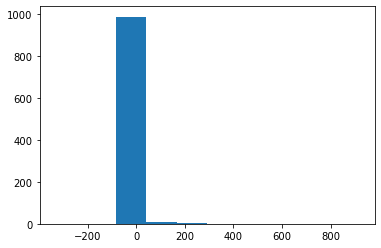

In [125]:
plt.hist(inversed_sample_y)

In [126]:
np.mean(inversed_sample_y), np.var(inversed_sample_y)**0.5

(2.146787731284569, 34.98457902652296)

In [127]:
np.percentile(inversed_sample_y, 50-34), np.percentile(inversed_sample_y, 50+34)

(-1.6226013940712587, 2.648596145591098)